In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#from elm import ELM
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import classification_report
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('newKDD.csv', header=0)
df=df.dropna()
array = df.values
x = array[:,0:35]
y = array[:,35]
x_test = x
y_test = y
n_classes=4

In [3]:
#from sklearn.model_selection import train_test_split
#df = pd.read_csv('Ravdess_OTHER.csv', header=0)
#df=df.dropna()
#array = df.values
#x = array[:,0:453]
#y = array[:,453]
#x_test = x
#y_test = y
#n_classes=2

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3)

# MAXE

In [5]:
SEED = 222

In [6]:
#Defining the models to be stacked.....THIS IS A NEW ENSEMBLE CALLED MAXE...the 1st of its kind...this is our contribution
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(n_estimators=100, max_features=25)
clf3 = GaussianNB()
lr = LogisticRegression()
xb=XGBClassifier()
dt=DecisionTreeClassifier()
et = ExtraTreesClassifier()
nn = MLPClassifier((100, 10), early_stopping=False, random_state=SEED)
gbm=GradientBoostingClassifier()
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())
sclf = StackingClassifier(classifiers=[nn, et,xb],meta_classifier=ada_clf)

In [7]:
import time
start = time.time() # Measuring the processing time
y_score=sclf.fit(x_train, y_train)
end = time.time()
print(end - start)

114.7244622707367


In [8]:
pred = sclf.predict(x_test)
y_pred_sclf = sclf.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_sclf,y_test)
print(cm)

[[20214     0     7    25]
 [   10 13770     0     2]
 [    7     0   305     4]
 [    2     0     1  3445]]


In [10]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['Normal','Dos','R2l','Probe'])
    df_cm2.columns=['Normal','Dos','R2l','Probe']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

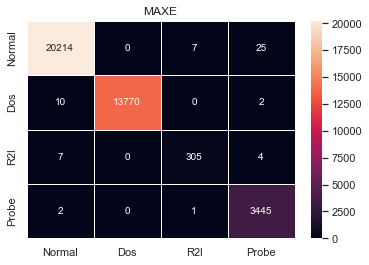

In [11]:
plot_heatmap(confusion_matrix(y_pred_sclf,y_test),'MAXE')

In [12]:
print(classification_report(y_pred_sclf,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9991    0.9984    0.9987     20246
         1.0     1.0000    0.9991    0.9996     13782
         2.0     0.9744    0.9652    0.9698       316
         3.0     0.9911    0.9991    0.9951      3448

    accuracy                         0.9985     37792
   macro avg     0.9911    0.9905    0.9908     37792
weighted avg     0.9985    0.9985    0.9985     37792



In [13]:
acc=accuracy_score(y_test,y_pred_sclf)
print("\nAccuracy: %.4f" % acc )


Accuracy: 0.9985


# RANDOM FOREST

In [14]:
seed = 100
rf = RandomForestClassifier()

In [15]:
import time
start = time.time() # Measuring the processing time
y_score=rf.fit(x_train, y_train)
end = time.time()
print(end - start)

4.847891807556152


In [16]:
pred = rf.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [17]:
cm=confusion_matrix(pred,y_test)
print(cm)

[[20225     2    14    22]
 [    3 13767     0     0]
 [    0     0   298     0]
 [    5     1     1  3454]]


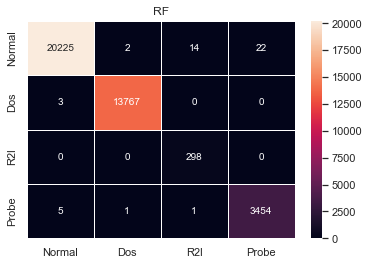

In [18]:
plot_heatmap(confusion_matrix(pred,y_test),'RF')

In [19]:
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9987


In [20]:
print(classification_report( pred,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9996    0.9981    0.9989     20263
         1.0     0.9998    0.9998    0.9998     13770
         2.0     0.9521    1.0000    0.9755       298
         3.0     0.9937    0.9980    0.9958      3461

    accuracy                         0.9987     37792
   macro avg     0.9863    0.9990    0.9925     37792
weighted avg     0.9988    0.9987    0.9987     37792



# GradientBoostingClassifier

In [21]:
gbc = GradientBoostingClassifier()

In [22]:
import time
start = time.time() # Measuring the processing time
y_score=gbc.fit(x_train, y_train)
end = time.time()
print(end - start)

66.04286623001099


In [23]:
pred1 = gbc.predict(x_test)
y_pred_gbc = gbc.predict(x_test)

In [24]:
cm=confusion_matrix(pred1,y_test)
print(cm)

[[20197     7    21    48]
 [    5 13760     0     2]
 [   12     0   291     0]
 [   19     3     1  3426]]


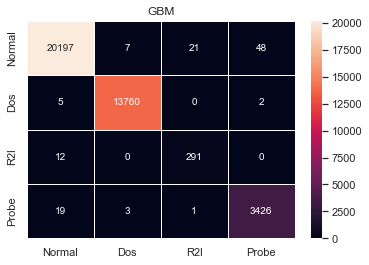

In [25]:
plot_heatmap(confusion_matrix(pred1,y_test),'GBM')

In [26]:
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9969


In [27]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9982    0.9963    0.9972     20273
         1.0     0.9993    0.9995    0.9994     13767
         2.0     0.9297    0.9604    0.9448       303
         3.0     0.9856    0.9933    0.9895      3449

    accuracy                         0.9969     37792
   macro avg     0.9782    0.9874    0.9827     37792
weighted avg     0.9969    0.9969    0.9969     37792



# AdaBoostClassifier

In [28]:
abc = AdaBoostClassifier()
#print('Accuracy of AdaBoostClassifier classifier on test set: {:.2f}'
#     .format(abc.score(x_test, y_test)))

In [29]:
import time
start = time.time() # Measuring the processing time
y_score=abc.fit(x_train, y_train)
end = time.time()
print(end - start)

4.3375160694122314


In [30]:
pred1 = abc.predict(x_test)
y_pred_abc = abc.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[19484   487    53   218]
 [   83 13266     0   316]
 [  316     0   259     4]
 [  350    17     1  2938]]


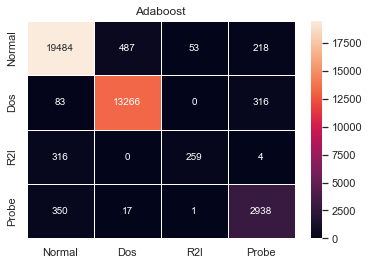

In [32]:
plot_heatmap(confusion_matrix(pred1,y_test),'Adaboost')

In [33]:
from sklearn.metrics import accuracy_score
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9512


In [34]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9630    0.9626    0.9628     20242
         1.0     0.9634    0.9708    0.9671     13665
         2.0     0.8275    0.4473    0.5807       579
         3.0     0.8452    0.8887    0.8664      3306

    accuracy                         0.9512     37792
   macro avg     0.8998    0.8173    0.8442     37792
weighted avg     0.9508    0.9512    0.9500     37792



# ExtraTrees

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10, max_features=25)

In [36]:
start = time.time() # Measuring the processing time
y_score=etc.fit(x_train, y_train)
end = time.time()
print(end - start)

1.469987154006958


In [37]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[19484   487    53   218]
 [   83 13266     0   316]
 [  316     0   259     4]
 [  350    17     1  2938]]


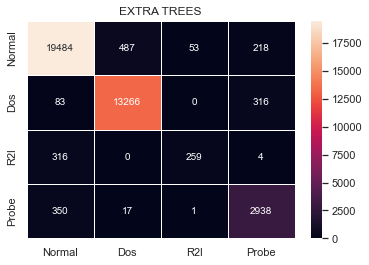

In [39]:
plot_heatmap(confusion_matrix(pred1,y_test),'EXTRA TREES')

In [40]:
from sklearn.metrics import accuracy_score
#start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
#end = time.time()
#print(end - start)


Accuracy: 0.9512


In [41]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9630    0.9626    0.9628     20242
         1.0     0.9634    0.9708    0.9671     13665
         2.0     0.8275    0.4473    0.5807       579
         3.0     0.8452    0.8887    0.8664      3306

    accuracy                         0.9512     37792
   macro avg     0.8998    0.8173    0.8442     37792
weighted avg     0.9508    0.9512    0.9500     37792



# Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bc = BaggingClassifier()

In [44]:
start = time.time() # Measuring the processing time
y_score=bc.fit(x_train, y_train)
end = time.time()
print(end - start)

3.6727452278137207


In [45]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred1,y_test)
print(cm)

[[19484   487    53   218]
 [   83 13266     0   316]
 [  316     0   259     4]
 [  350    17     1  2938]]


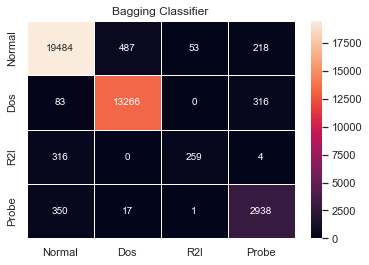

In [47]:
plot_heatmap(confusion_matrix(pred1,y_test),'Bagging Classifier')

In [48]:
from sklearn.metrics import accuracy_score
start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
end = time.time()
print(end - start)


Accuracy: 0.9512
0.005000114440917969


In [49]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9630    0.9626    0.9628     20242
         1.0     0.9634    0.9708    0.9671     13665
         2.0     0.8275    0.4473    0.5807       579
         3.0     0.8452    0.8887    0.8664      3306

    accuracy                         0.9512     37792
   macro avg     0.8998    0.8173    0.8442     37792
weighted avg     0.9508    0.9512    0.9500     37792



In [50]:
xg = XGBClassifier()

In [51]:
start = time.time() # Measuring the processing time
y_score=xg.fit(x_train, y_train)
end = time.time()
print(end - start)

18.42990469932556


In [52]:
pred1 = abc.predict(x_test)
y_pred_abc = etc.predict(x_test)

In [53]:
cm=confusion_matrix(pred1,y_test)
print(cm)

[[19484   487    53   218]
 [   83 13266     0   316]
 [  316     0   259     4]
 [  350    17     1  2938]]


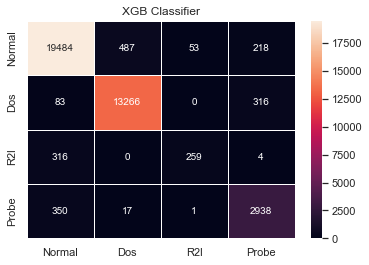

In [54]:
plot_heatmap(confusion_matrix(pred1,y_test),'XGB Classifier')

In [55]:
start = time.time() # Measuring the processing time
acc=accuracy_score(y_test,pred1)
print("\nAccuracy: %.4f" % acc )
end = time.time()
print(end - start)


Accuracy: 0.9512
0.0


In [56]:
print(classification_report( pred1,y_test, digits = 4))

              precision    recall  f1-score   support

         0.0     0.9630    0.9626    0.9628     20242
         1.0     0.9634    0.9708    0.9671     13665
         2.0     0.8275    0.4473    0.5807       579
         3.0     0.8452    0.8887    0.8664      3306

    accuracy                         0.9512     37792
   macro avg     0.8998    0.8173    0.8442     37792
weighted avg     0.9508    0.9512    0.9500     37792

